In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime
from tqdm import tqdm

**Description:** This file contains monthly means and monthly anomalies for surface air temperature from ERA5 averaged over the global domain (0–360°E,  90°S–90°N) from 1940 to 2023.

**Reference period:** Anomalies are calculated relative to the average for the 1991-2020 reference period. The monthly climatology is provided in the '2t_clim' column.

**Link to the original gridded data:** https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means

**Columns:**
- 2t: Monthly absolute temperature
- 2t_clim_91-20: Monthly climatology for 1991-2020 
- 2t_ano_91-20: Monthly anomaly relative to 1991-2020

**Units:** Degrees C
**Last updated:** 04 Dec 2023

In [3]:
# Importing the data
df = pd.read_csv('Data/era5_global_sfc_temp_monthly_anomalies_all_months_1940-2023.csv', skiprows = [0,1,2,3,4,5,6,7,8])

In [4]:
# Turning date column into a datetime format
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')

In [5]:
# Creating a new dataframe as a subset of the original one with just the dates from 1951 to 1980
# to serve as reference period
df_ref = df.loc[(df['date'] >= pd.to_datetime(datetime.date(1951,1,1))) & (df['date'] < pd.to_datetime(datetime.date(1981,1,1)))].reset_index(drop = True)

In [6]:
# Compute the mean temperature of each month in the reference period
ref_months = []

for i in range(12):
    ref_months.append(df_ref.iloc[[12*j + i for j in range(30)]]['2t'].mean())

In [7]:
# Compute temperature anomaly by subtracting the measured temperature with the average
temp_anom = []

for i in range(len(df)):
    temp_anom.append(df['2t'][i] - ref_months[i%12])

In [8]:
# Creates a new column named 'anomaly' that contains the temperature anomaly data
df['anomaly'] = np.array(temp_anom)

In [9]:
#https://en.m.wikipedia.org/wiki/File:20180522_Color_palette_for_warming_stripes_-_ColorBrewer_9-class_single_hue.svg
IPCC_colors = ["#08306b", "#08519c", "#2171b5", "#4292c6", "#6baed6", "#9ecae1",
               "#c6dbef", "#deebf7", "#fee0d2", "#fcbba1", "#fc9272", "#fb6a4a",
               "#ef3b2c", "#cb181d", "#a50f15", "#67000d"]
IPCC_cmap = mpl.colors.LinearSegmentedColormap.from_list("", IPCC_colors)

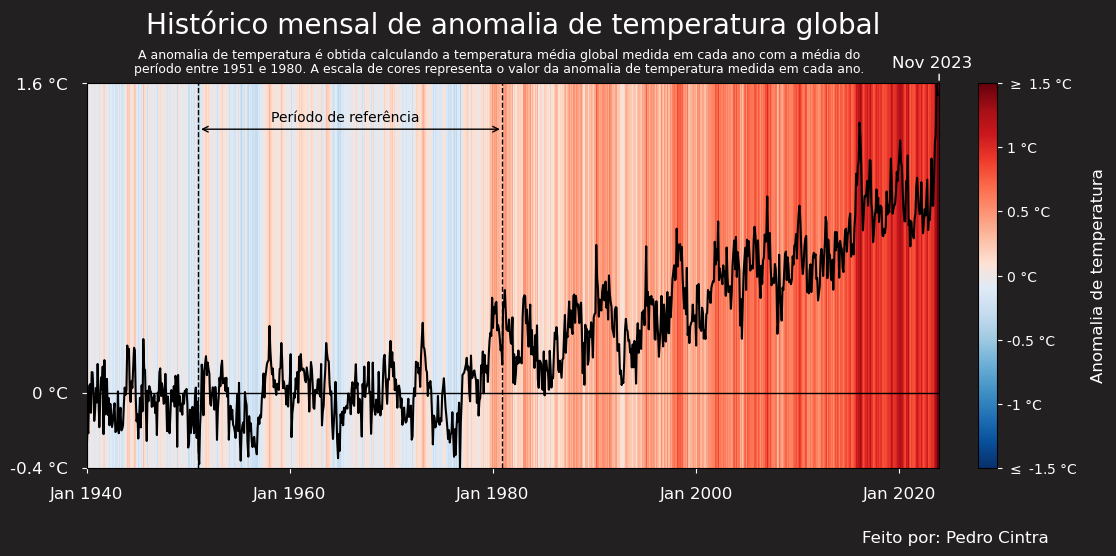

In [10]:
# Plot specifications
fig, ax = plt.subplots(figsize=(11,5))

dx = 3/IPCC_cmap.N # Size of a temperature band corresponding to a color in the colormap
cmap = IPCC_cmap # Colormap

# Plot bars for each month from 1940 to 2023
for i in range(len(df)):
    color_index = int((df['anomaly'][i] + 1.5)//dx)
    ax.bar(i, 1, align = 'edge', width = 1, color = IPCC_cmap(color_index))

# Plot the temperature anomaly curve
ax.plot([i for i in range(len(df))], (df['anomaly'] - df['anomaly'].min())/(df['anomaly'].max()-df['anomaly'].min()),
         color = 'black', lw = 1.5)
# x-axis customization
ax.set_xlim(0, len(df))
ax.set_xticks([0,
                df.loc[df['date'] == pd.to_datetime(datetime.date(1960,1,1))].index[0],
                df.loc[df['date'] == pd.to_datetime(datetime.date(1980,1,1))].index[0],
                df.loc[df['date'] == pd.to_datetime(datetime.date(2000,1,1))].index[0],
                df.loc[df['date'] == pd.to_datetime(datetime.date(2020,1,1))].index[0]])
ax.set_xticklabels(['Jan 1940','Jan 1960','Jan 1980','Jan 2000','Jan 2020'],
               color = 'white', fontsize = 12)
# y-axis customization
ax.set_ylim(0, 1)
ax.set_yticks([0,-df['anomaly'].min()/(df['anomaly'].max()-df['anomaly'].min()),1])
ax.set_yticklabels([f"{df['anomaly'].min():.1f} °C",'0 °C',f"{df['anomaly'].max():.1f} °C"],
               color = 'white', fontsize = 12)
# Reference period delimitation
ax.axhline(-df['anomaly'].min()/(df['anomaly'].max()-df['anomaly'].min()), color = 'black', lw = 1)
ax.axvline(df.loc[df['date'] == pd.to_datetime(datetime.date(1951,1,1))].index[0], lw = 1, color = 'black',
            ls = '--')
ax.axvline(df.loc[df['date'] == pd.to_datetime(datetime.date(1980,12,1))].index[0], lw = 1, color = 'black',
            ls = '--')
# Arrow inside reference period
ax.annotate('', xy=(0.131, 0.88), xycoords='axes fraction', xytext=(0.488, 0.88),
            arrowprops=dict(arrowstyle="<->", color='black', lw = 1))
# Text indicating reference period
ax.text(df.loc[df['date'] == pd.to_datetime(datetime.date(1965,6,1))].index[0], 0.9, 'Período de referência',
         color = 'black', ha = 'center')

# White ticks for both axis
ax.tick_params(axis='both', colors='white', pad=10)

# Adding Nov 2023
fig.text(0.93, 0.91, 'Nov 2023', ha = 'right', color = 'white', fontsize = 12)
ax.annotate('', xy=(1, 1), xycoords='axes fraction', xytext=(1, 1.03),
            arrowprops=dict(arrowstyle="-", color='white', lw = 1))

# Title
ax.set_title('Histórico mensal de anomalia de temperatura global',
              fontsize = 20, color = 'white', pad = 36)
# Subtitle
fig.text(0.5, 0.9, 'A anomalia de temperatura é obtida calculando a temperatura média global medida em cada ano com a média do'
        '\n'
        'período entre 1951 e 1980. A escala de cores representa o valor da anomalia de temperatura medida em cada ano.',
         ha = 'center', fontsize = 9, color = 'white')

# Credits
fig.text(1, -0.04, 'Feito por: Pedro Cintra',
         color = 'white', fontsize = 12, ha = 'right')

# New axis to add colorbar
newax = fig.add_axes([0.68, 0.11, 0.3, 0.77], anchor = 'NE', zorder = 0)
a = np.array([[-1.5,1.5]])
img = plt.imshow(a, cmap=cmap)
plt.gca().set_visible(False)
# Colorbar
cbar = plt.colorbar(orientation="vertical", ax=newax, shrink = 1)
# y-axis customization of colorbar
cbar.ax.set_yticks([-1.5,-1,-0.5,0,0.5,1,1.5])
cbar.ax.set_yticklabels(['$\leq$ -1.5 °C','-1 °C','-0.5 °C','0 °C','0.5 °C','1 °C','$\geq$ 1.5 °C'], color = 'white')
cbar.ax.set_ylabel('Anomalia de temperatura', fontsize = 12, labelpad = 10, color = 'white')
cbar.ax.tick_params(axis='y', color='white')

# Setting the background color
ax.patch.set_facecolor('#222021')
fig.patch.set_facecolor('#222021')

# Save figure
plt.savefig('Plots/Historical_temp_anomaly.png', dpi = 400, bbox_inches = 'tight')
plt.show()